# Customer Segmentation

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.gif?raw=true">

In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into **groups that reflect similarities among customers in each cluster**.

We will divide customers into segments to **optimize the significance of each customer to the business**.

To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.




<a id="1"></a>
## IMPORTING LIBRARIES

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
import plotly.express as px

#
if not sys.warnoptions:
    warnings.simplefilter("ignore")
#
np.random.seed(42)

## LOADING DATA

In [2]:
#Loading the dataset
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.png?raw=true">

For more information on the attributes:

**People**
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

<a id="3"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>


**In this section**
* Data Cleaning
* Feature Engineering

In order to, get a full grasp of what steps should I be taking to clean the dataset.
Let us have a look at the information in data.


In [4]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In the next step, I am going to create a feature out of **"Dt_Customer"** that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

In [6]:
#
data["Dt_Customer"]#.value_counts()

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2216, dtype: object

In [7]:
#
pd.to_datetime(data["Dt_Customer"], dayfirst=True)

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [8]:
#
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)

#
dates = []

#
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

# Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))


The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature **("Customer_For")** of the number of days the customers started to shop in the store relative to the last recorded date

In [9]:
# Created a feature "Customer_For"
days = []

#
d1 = max(dates) #taking it to be the newest customer

for i in dates:
    delta = (d1 - i).days
    days.append(delta)

data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

data["Customer_For"]

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: Customer_For, Length: 2216, dtype: int64

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.  

In [10]:
#
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 



In [11]:
#
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


**In the next bit, I will be performing the following steps to engineer some new features:**

* Extract the **"Age"** of a customer by the **"Year_Birth"** indicating the birth year of the respective person.
* Create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
* Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating **"Family_Size"**
* Create a feature **"Is_Parent"** to indicate parenthood status
* Lastly, I will create three categories in the **"Education"** by simplifying its value counts.
* Dropping some of the redundant features

In [12]:
#Feature Engineering
#Age of customer today
data["Age"] = 2021-data["Year_Birth"]

data["Age"]#.value_counts()

0       64
1       67
2       56
3       37
4       40
        ..
2235    54
2236    75
2237    40
2238    65
2239    67
Name: Age, Length: 2216, dtype: int64

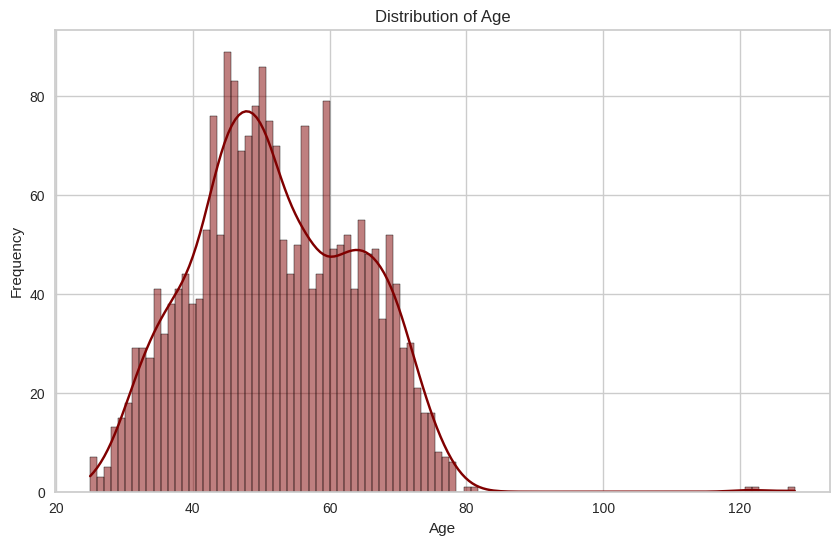

In [13]:
#
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=100, kde=True, color='maroon')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
#Total spendings on various items
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + \
                data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

data["Spent"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2216, dtype: int64

In [15]:
#Deriving living situation by marital status"Alone"
# Married     857
# Together    573
# Single      471
# Divorced    232
# Widow        76
# Alone         3
# Absurd        2
# YOLO          2

data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner",
                                                      "Together":"Partner",
                                                      "Absurd":"Alone",
                                                      "Widow":"Alone",
                                                      "YOLO":"Alone",
                                                      "Divorced":"Alone",
                                                      "Single":"Alone",})

data["Living_With"].value_counts()

Living_With
Partner    1430
Alone       786
Name: count, dtype: int64

In [16]:
#Feature indicating total children living in the household
data["Children"] = data["Kidhome"] + data["Teenhome"]

data["Children"].value_counts()

Children
1    1117
0     633
2     416
3      50
Name: count, dtype: int64

In [17]:
#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].map({"Alone": 1, "Partner": 2}) + data["Children"]

data["Family_Size"].value_counts()

Family_Size
3    880
2    757
4    296
1    252
5     31
Name: count, dtype: int64

In [18]:
#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

data["Is_Parent"].value_counts()

Is_Parent
1    1583
0     633
Name: count, dtype: int64

In [19]:
#Segmenting education levels in three groups
# Graduation    1116
# PhD            481
# Master         365
# 2n Cycle       200
# Basic           54

data["Education"]= data["Education"].replace({"Basic":"Undergraduate",
                                              "2n Cycle":"Undergraduate",
                                              "Graduation":"Graduate",
                                              "Master":"Postgraduate",
                                              "PhD":"Postgraduate"})

data["Education"].value_counts()

Education
Graduate         1116
Postgraduate      846
Undergraduate     254
Name: count, dtype: int64

In [20]:
#For clarity
data = data.rename(columns={"MntWines": "Wines",
                            "MntFruits":"Fruits",
                            "MntMeatProducts":"Meat",
                            "MntFishProducts":"Fish",
                            "MntSweetProducts":"Sweets",
                            "MntGoldProds":"Gold"})


In [21]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]

data = data.drop(to_drop, axis=1)

Now that we have some new features let's have a look at the data's stats.

In [22]:
#

data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean     26.356047   166.995939    37.637635    27.028881    43.965253   
std      39.793917   224.283273    54.752082    41.072046    51.815414   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    16.000000     3.000000     1.000000     9.000000   
50%       8.000000    68.000000    12.000000     8.000000    24.500000   
75%      33.000000   232.250000    50.000000    33.000000    56.000000   
max     199.000000  1725.000000   259.000000   262.000000   321.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2216.000000      2216.000000          2216.000000   
mean            2.323556         4.085289             2.671029   
std             1.923716         2.740951             2.926734   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2216.000000        2216.000000   2216.000000   2216.000000   
mean            5.800993           5.319043      0.073556      0.074007   
std             3.250785           2.425359      0.261106      0.261842   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2216.000000   2216.000000   2216.000000  2216.000000  2216.000000   
mean       0.073105      0.064079      0.013538     0.009477     0.150271   
std        0.260367      0.244950      0.115588     0.096907     0.357417   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

       Customer_For          Age        Spent     Children  Family_Size  \
count   2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean     353.521209    52.179603   607.075361     0.947202     2.592509   
std      202.434667    11.985554   602.900476     0.749062     0.905722   
min        0.000000    25.000000     5.000000     0.000000     1.000000   
25%      180.000000    44.000000    69.000000     0.000000     2.000000   
50%      355.500000    51.000000   396.500000     1.000000     3.000000   
75%      529.000000    62.000000  1048.000000     1.000000     3.000000   
max      699.000000   128.000000  2525.000000     3.000000     5.000000   

         Is_Parent  


**Plotting**

<Figure size 800x550 with 0 Axes>

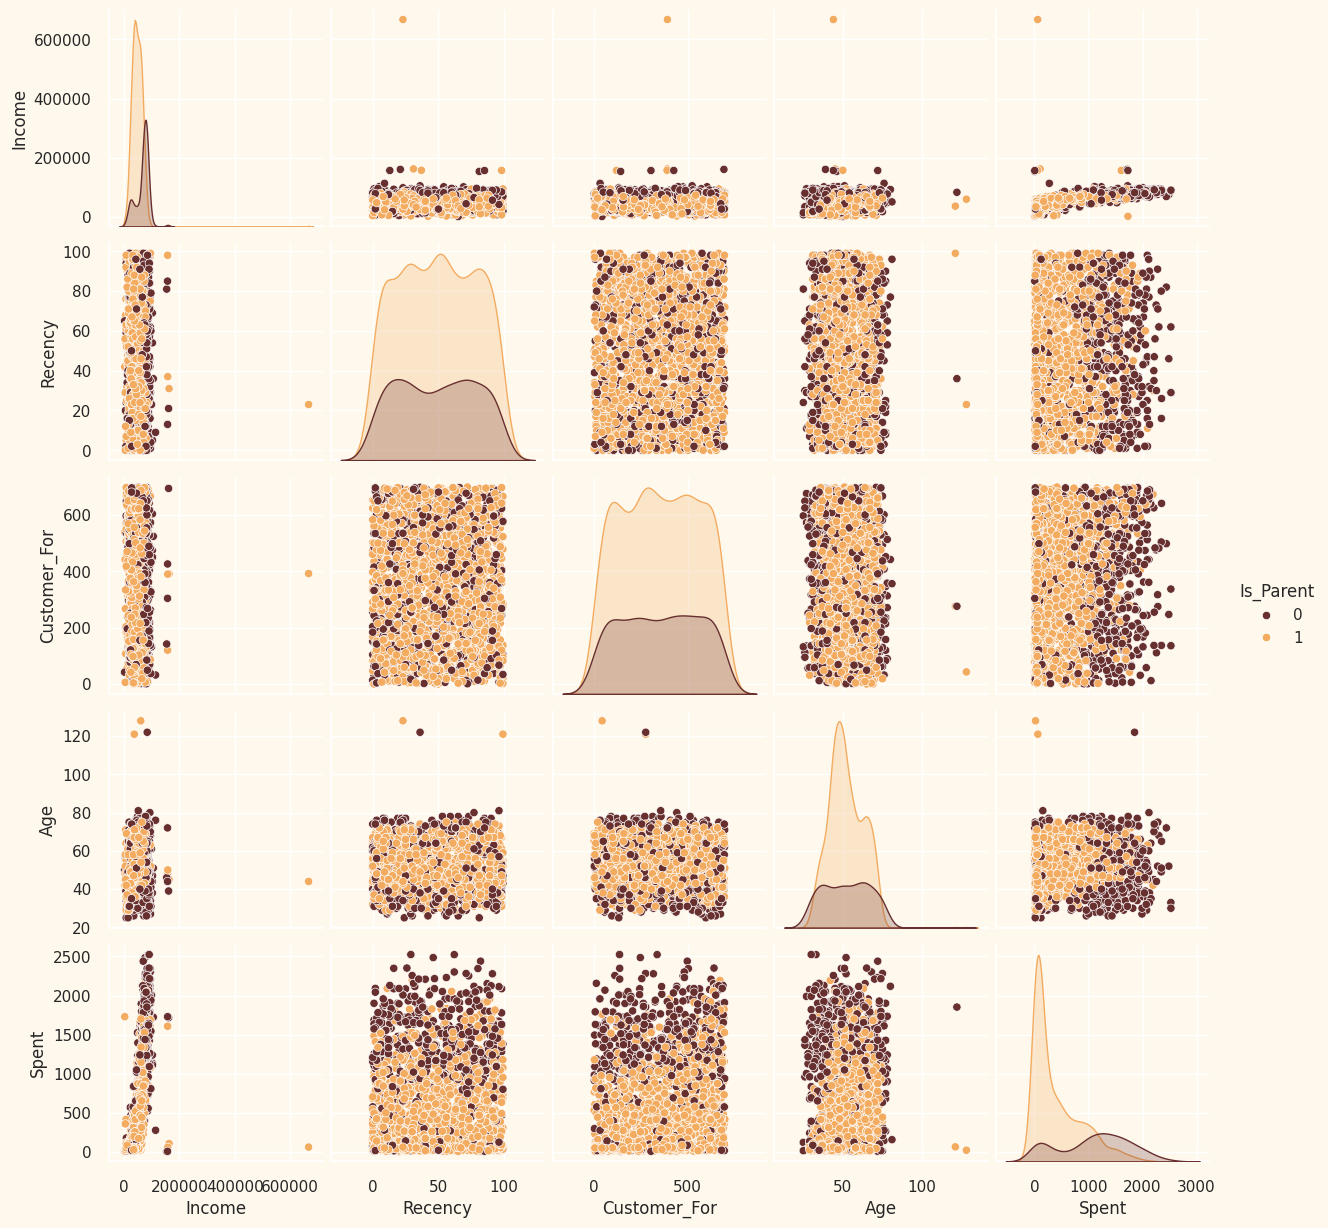

In [23]:
#To plot some selected features
#Setting up colors prefrences

sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]

plt.figure()

sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))

plt.show()

Clearly, there are a few outliers in the Income and Age features.
I will be deleting the outliers in the data.

In [24]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<150000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2205


<Figure size 800x550 with 0 Axes>

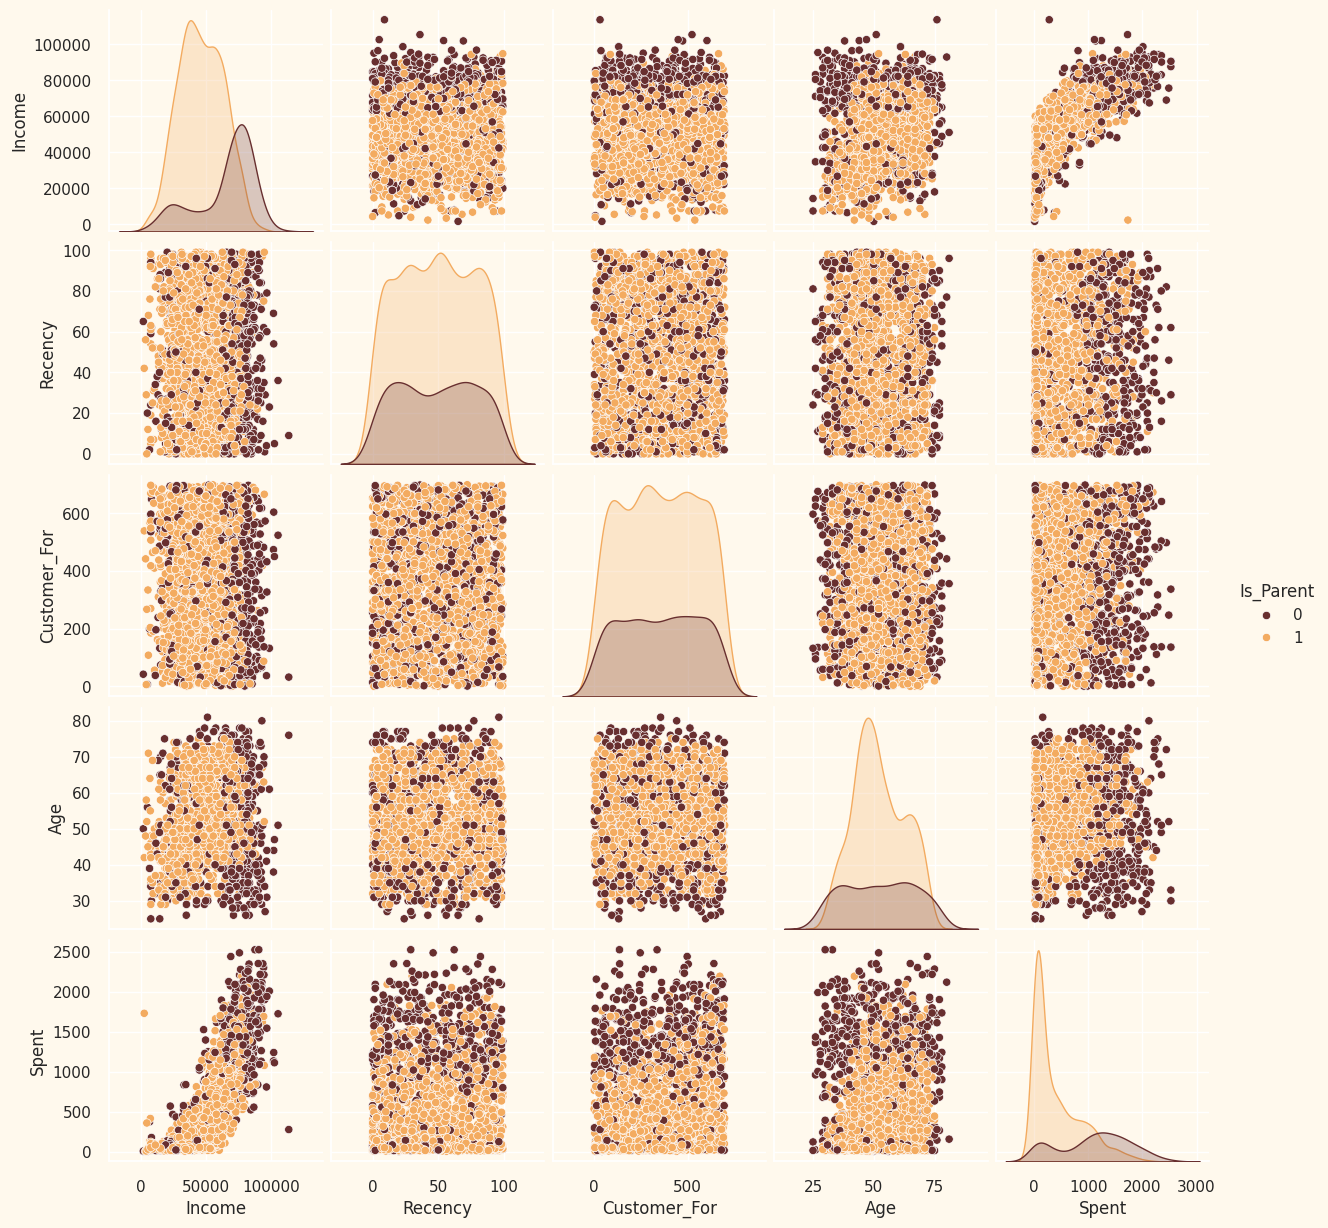

In [25]:
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]

plt.figure()

sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))

plt.show()

Next, let us look at the correlation amongst the features.
(Excluding the categorical attributes at this point)

Columns omitted from correlation calculation: ['Education', 'Living_With']


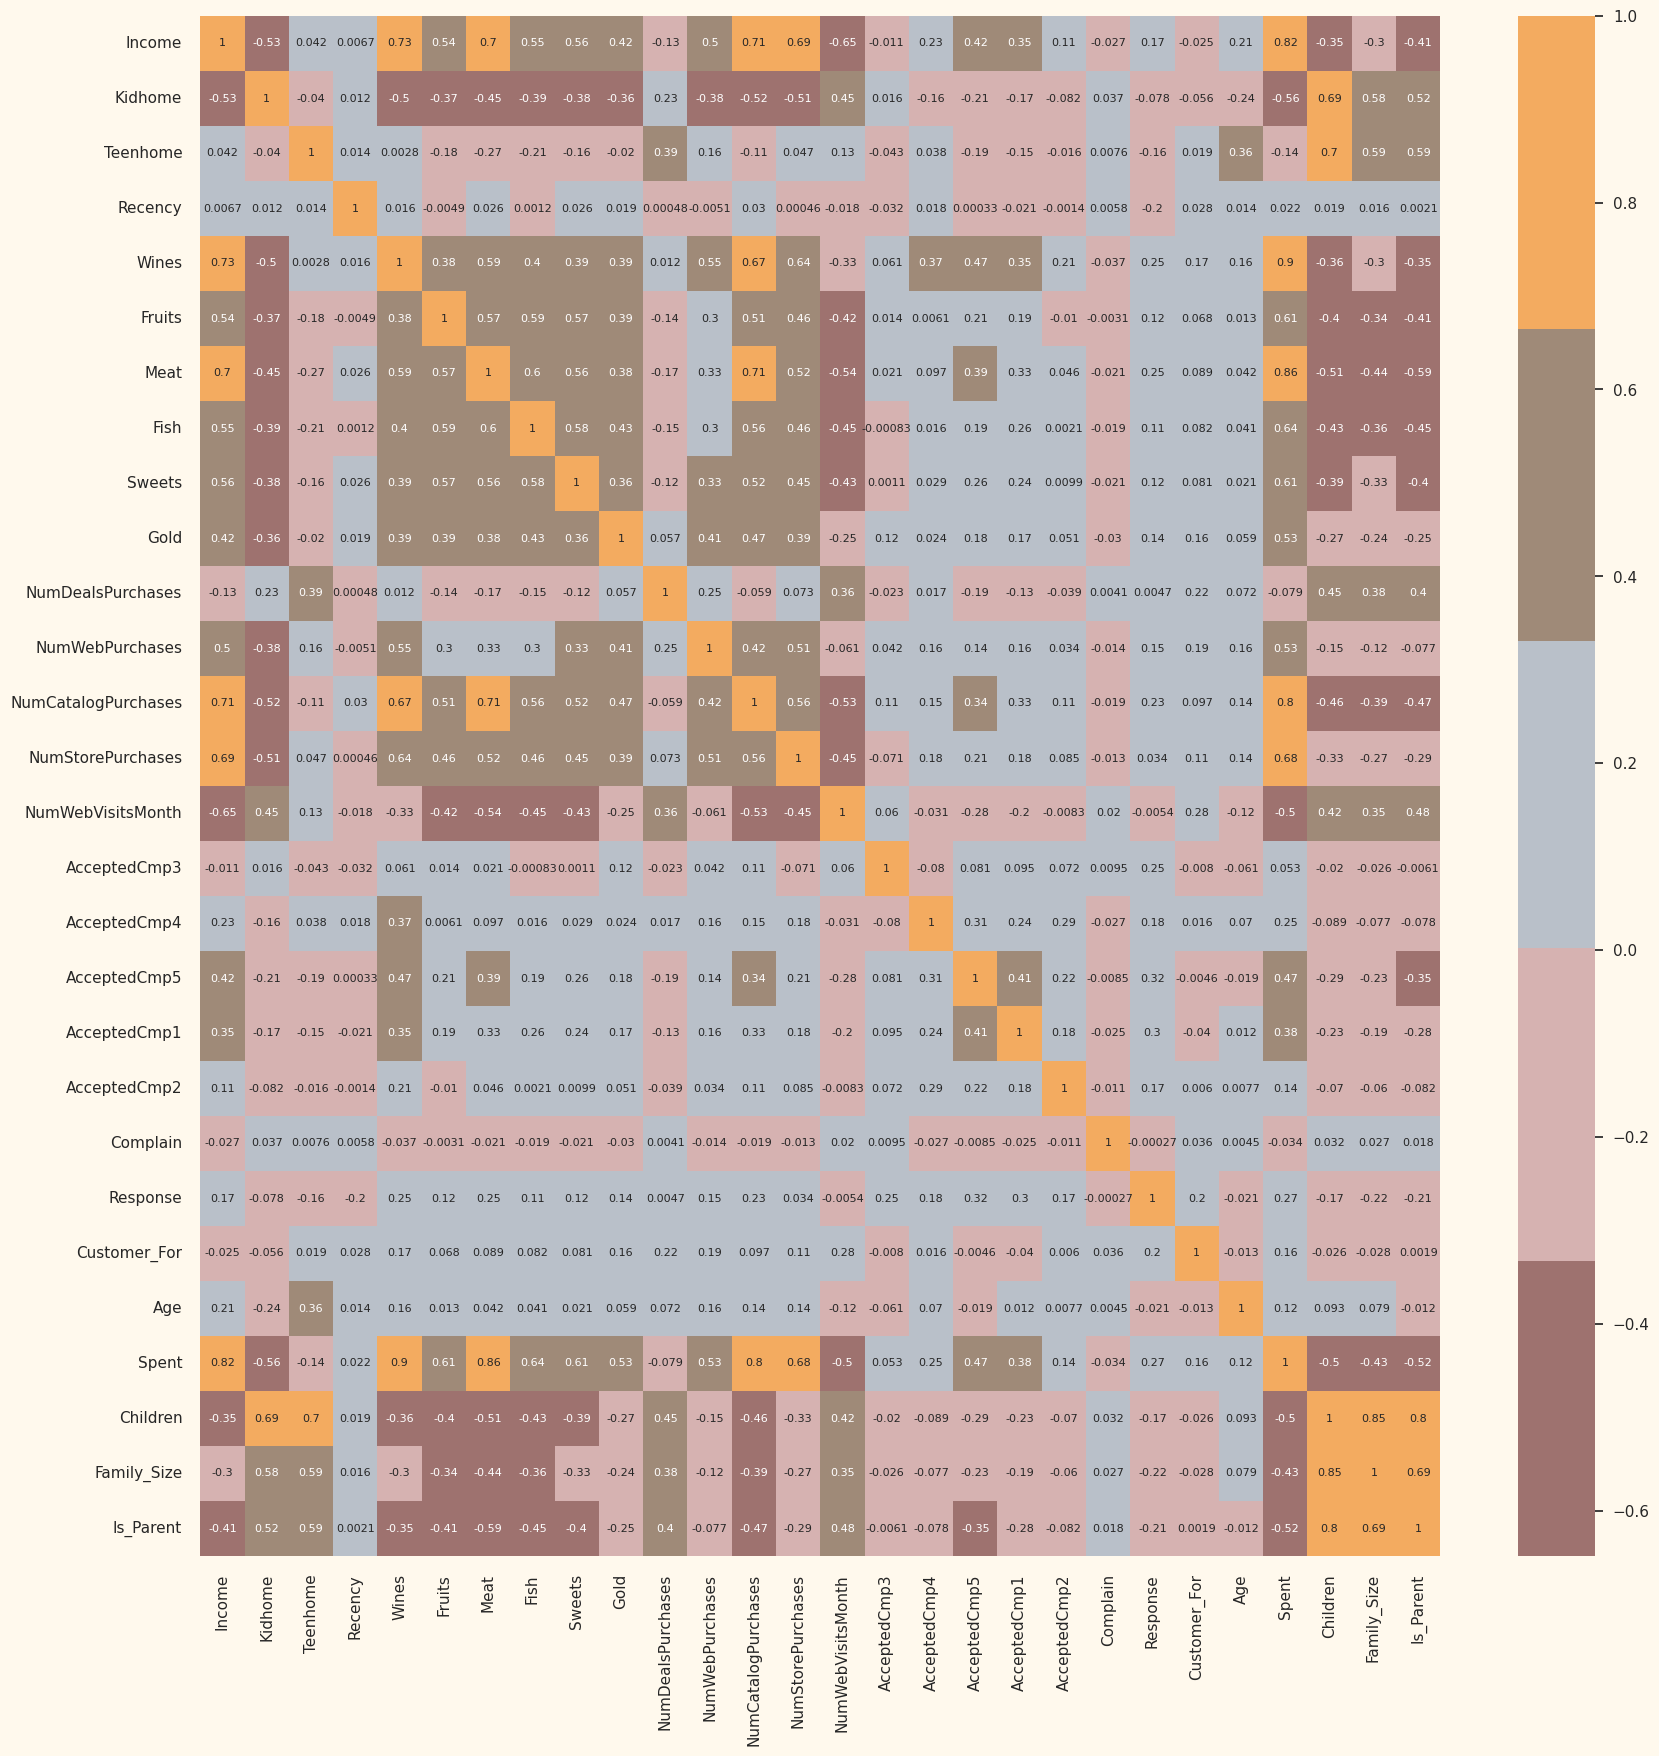

In [26]:
# Get list of categorical variables (object dtypes) before correlation calculation
s_obj = (data.dtypes == 'object')
object_cols_for_corr = list(s_obj[s_obj].index)

# Create a temporary DataFrame by dropping object columns for correlation calculation
numeric_data_for_corr = data.drop(columns = object_cols_for_corr)

#correlation matrix for numeric data
corrmat= numeric_data_for_corr.corr()

plt.figure(figsize = (20,20))

sns.heatmap(corrmat, annot = True, cmap = cmap, center = 0, annot_kws={"size": 8})

print("Columns omitted from correlation calculation:", object_cols_for_corr)

The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data.

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Scaling the features using the standard scaler
* Creating a subset dataframe for dimensionality reduction

In [27]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [28]:
#Label Encoding the object dtypes.
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [29]:
#
data.Education.value_counts()

Education
0    1113
1     840
2     252
Name: count, dtype: int64

In [30]:
#
data.Living_With.value_counts()

Living_With
1    1422
0     783
Name: count, dtype: int64

In [31]:
#Creating a copy of data
ds = data.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis = 1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns = ds.columns)
print("All features are now scaled")

All features are now scaled


In [32]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.892338  0.314651 -0.823405 -0.930767  0.310830  0.974566  1.548614   
1  -0.892338 -0.254877  1.038757  0.906602 -0.380600 -0.874776 -0.638664   
2  -0.892338  0.965354 -0.823405 -0.930767 -0.795458  0.355155  0.568110   
3  -0.892338 -1.206087  1.038757 -0.930767 -0.795458 -0.874776 -0.563241   
4   0.571654  0.322136  1.038757 -0.930767  1.555404 -0.394659  0.417263   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.748400  2.449154  1.480301  0.849556           0.361479         1.424772   
1 -0.731678 -0.652345 -0.635399 -0.735767          -0.168834        -1.132957   
2 -0.175957  1.336263 -0.149031 -0.039771          -0.699147         1.424772   
3 -0.667380 -0.506392 -0.586763 -0.755100          -0.168834        -0.767567   
4 -0.217292  0.150396 -0.003121 -0.561768           1.422105         0.328602   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_For  \
0             2.628526          -0.562650           0.689203      1.527183   
1            -0.588043          -1.179732          -0.139645     -1.188629   
2            -0.230646           1.288596          -0.554069     -0.205999   
3            -0.945440          -0.562650           0.274779     -1.060245   
4             0.126750           0.054432          -0.139645     -0.951612   

        Age     Spent  Living_With  Children  Family_Size  Is_Parent  
0  1.017189  1.679323    -1.347625 -1.266589    -1.759012   -1.58466  
1  1.273530 -0.963897    -1.347625  1.403420     0.448513    0.63105  
2  0.333612  0.281242     0.742046 -1.266589    -0.655250   -1.58466  
3 -1.289883 -0.920675     0.742046  0.068415     0.448513    0.63105  
4 -1.033542 -0.307248     0.742046  0.068415     0.448513    0.63105

In [33]:
#
ds.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      88    88                  3                8                   10   
1       1     6                  2                1                    1   
2      21    42                  1                8                    2   
3       3     5                  2                2                    0   
4      27    15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  Customer_For  Age  Spent  \
0                  4                  7           663   64   1617   
1                  2                  5           113   67     27   
2                 10                  4           312   56    776   
3                  4                  6           139   37     53   
4                  6                  5           161   40    422   

   Living_With  Children  Family_Size  Is_Parent  
0            0         0            1          0  
1            0         2            3          1  
2            1         0            2          0  
3            1         1            3          1  
4            1         1            3          1

In [34]:
#
scaled_ds.describe().T

count          mean       std       min       25%  \
Education            2205.0 -6.605953e-17  1.000227 -0.892338 -0.892338   
Income               2205.0  2.255691e-17  1.000227 -2.409272 -0.793211   
Kidhome              2205.0  4.833624e-18  1.000227 -0.823405 -0.823405   
Teenhome             2205.0  1.933450e-17  1.000227 -0.930767 -0.930767   
Recency              2205.0  7.975480e-17  1.000227 -1.694318 -0.864601   
Wines                2205.0 -2.416812e-17  1.000227 -0.907377 -0.836248   
Fruits               2205.0  2.175131e-17  1.000227 -0.663806 -0.613523   
Meat                 2205.0  1.611208e-18  1.000227 -0.759235 -0.685751   
Fish                 2205.0 -4.833624e-18  1.000227 -0.688833 -0.634101   
Sweets               2205.0  2.658493e-17  1.000227 -0.659718 -0.635399   
Gold                 2205.0  2.739054e-17  1.000227 -0.851766 -0.677767   
NumDealsPurchases    2205.0  1.305078e-16  1.000227 -1.229460 -0.699147   
NumWebPurchases      2205.0 -3.544658e-17  1.000227 -1.498347 -0.767567   
NumCatalogPurchases  2205.0  3.222416e-18  1.000227 -0.945440 -0.945440   
NumStorePurchases    2205.0  1.019089e-16  1.000227 -1.796814 -0.871191   
NumWebVisitsMonth    2205.0  3.544658e-17  1.000227 -2.211765 -0.968493   
Customer_For         2205.0  1.305078e-16  1.000227 -1.746605 -0.857793   
Age                  2205.0  1.643432e-16  1.000227 -2.315248 -0.691753   
Spent                2205.0  9.667248e-18  1.000227 -1.000470 -0.894077   
Living_With          2205.0  6.444832e-17  1.000227 -1.347625 -1.347625   
Children             2205.0 -7.089315e-17  1.000227 -1.266589 -1.266589   
Family_Size          2205.0 -1.353415e-16  1.000227 -1.759012 -0.655250   
Is_Parent            2205.0  5.155866e-17  1.000227 -1.584660 -1.584660   

                          50%       75%       max  
Education           -0.892338  0.571654  2.035647  
Income              -0.016182  0.804453  2.999363  
Kidhome             -0.823405  1.038757  2.900920  
Teenhome            -0.930767  0.906602  2.743970  
Recency             -0.000314  0.863974  1.728262  
Wines               -0.379840  0.595214  3.517411  
Fruits              -0.462677  0.165852  4.339279  
Meat                -0.446928  0.306280  7.163236  
Fish                -0.469904  0.223372  4.036392  
Sweets              -0.465171  0.167108  5.711701  
Gold                -0.368436  0.230894  5.354193  
NumDealsPurchases   -0.168834  0.361479  6.725234  
NumWebPurchases     -0.036788  0.693992  8.367179  
NumCatalogPurchases -0.230646  0.484147  9.061664  
NumStorePurchases   -0.254109  0.671514  2.214218  
NumWebVisitsMonth    0.274779  0.689203  6.076714  
Customer_For         0.011266  0.865513  1.704945  
Age                 -0.093624  0.846295  2.469790  
Spent               -0.348808  0.731754  3.188785  
Living_With          0.742046  0.742046  0.742046  
Children             0.068415  0.068415  2.738424  
Family_Size          0.448513  0.448513  2.656038  
Is_Parent            0.631050  0.631050  0.631050

In [35]:
#
ds.describe().T

count          mean           std     min      25%  \
Education            2205.0      0.609524      0.683219     0.0      0.0   
Income               2205.0  51622.094785  20713.063826  1730.0  35196.0   
Kidhome              2205.0      0.442177      0.537132     0.0      0.0   
Teenhome             2205.0      0.506576      0.544380     0.0      0.0   
Recency              2205.0     49.009070     28.932111     0.0     24.0   
Wines                2205.0    306.164626    337.493839     0.0     24.0   
Fruits               2205.0     26.403175     39.784484     0.0      2.0   
Meat                 2205.0    165.312018    217.784507     0.0     16.0   
Fish                 2205.0     37.756463     54.824635     0.0      3.0   
Sweets               2205.0     27.128345     41.130468     0.0      1.0   
Gold                 2205.0     44.057143     51.736211     0.0      9.0   
NumDealsPurchases    2205.0      2.318367      1.886107     0.0      1.0   
NumWebPurchases      2205.0      4.100680      2.737424     0.0      2.0   
NumCatalogPurchases  2205.0      2.645351      2.798647     0.0      0.0   
NumStorePurchases    2205.0      5.823583      3.241796     0.0      3.0   
NumWebVisitsMonth    2205.0      5.336961      2.413535     0.0      3.0   
Customer_For         2205.0    353.718367    202.563647     0.0    180.0   
Age                  2205.0     52.095692     11.705801    25.0     44.0   
Spent                2205.0    606.821769    601.675284     5.0     69.0   
Living_With          2205.0      0.644898      0.478653     0.0      0.0   
Children             2205.0      0.948753      0.749231     0.0      0.0   
Family_Size          2205.0      2.593651      0.906197     1.0      2.0   
Is_Parent            2205.0      0.715193      0.451425     0.0      0.0   

                         50%      75%       max  
Education                0.0      1.0       2.0  
Income               51287.0  68281.0  113734.0  
Kidhome                  0.0      1.0       2.0  
Teenhome                 0.0      1.0       2.0  
Recency                 49.0     74.0      99.0  
Wines                  178.0    507.0    1493.0  
Fruits                   8.0     33.0     199.0  
Meat                    68.0    232.0    1725.0  
Fish                    12.0     50.0     259.0  
Sweets                   8.0     34.0     262.0  
Gold                    25.0     56.0     321.0  
NumDealsPurchases        2.0      3.0      15.0  
NumWebPurchases          4.0      6.0      27.0  
NumCatalogPurchases      2.0      4.0      28.0  
NumStorePurchases        5.0      8.0      13.0  
NumWebVisitsMonth        6.0      7.0      20.0  
Customer_For           356.0    529.0     699.0  
Age                     51.0     62.0      81.0  
Spent                  397.0   1047.0    2525.0  
Living_With              1.0      1.0       1.0  
Children                 1.0      1.0       3.0  
Family_Size              3.0      3.0       5.0  
Is_Parent                1.0      1.0       1.0

<a id="5"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>
In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.  
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.*

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

For this project, I will be reducing the dimensions to 3.

In [36]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)

pca.fit(scaled_ds)

PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns = (["col1","col2", "col3"]))

PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2205.0  7.089315e-17  2.902887 -6.056713 -2.564458 -0.784505  2.413093   
col2  2205.0  8.378282e-17  1.715289 -4.197462 -1.326101 -0.175892  1.235168   
col3  2205.0  1.812609e-17  1.231041 -3.642111 -0.856648 -0.058354  0.856892   

           max  
col1  7.518037  
col2  6.190975  
col3  6.887431

In [37]:
# Calculate explained variance for each component
explained_variance = pca.explained_variance_ratio_ * 100

fig = px.scatter_3d(PCA_ds, x='col1', y='col2', z='col3',
                    title='A 3D Projection Of Data In The Reduced Dimension',
                    color_continuous_scale=px.colors.sequential.Viridis,
                    size_max=2, # Adjust the maximum size of the markers
                    opacity=0.7)

fig.update_layout(
    scene=dict(
        xaxis_title=f'Principal Component 1 ({explained_variance[0]:.2f}%)',
        yaxis_title=f'Principal Component 2 ({explained_variance[1]:.2f}%)',
        zaxis_title=f'Principal Component 3 ({explained_variance[2]:.2f}%)'
    ),
    title_font_size=20 # Adjust the main title font size
)

fig.show()

<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


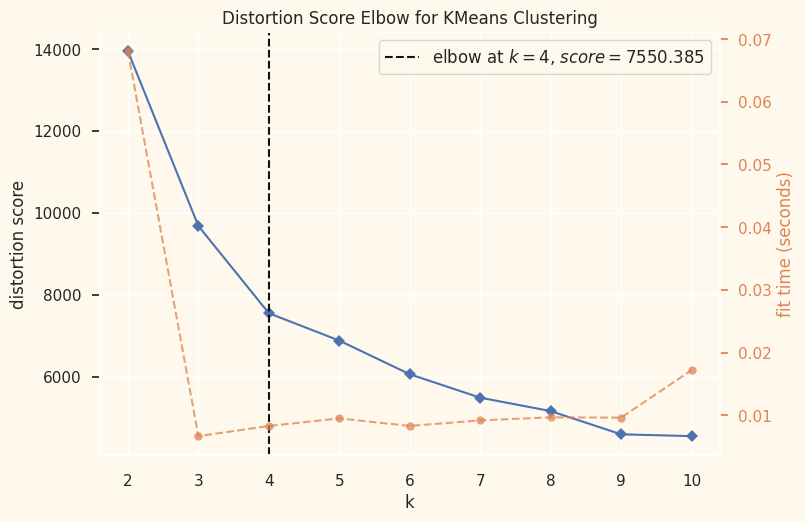

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)

Elbow_M.fit(PCA_ds)

Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data.
Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [39]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

In [40]:
#
fig = px.scatter_3d(PCA_ds, x='col1', y='col2', z='col3',
                    color=PCA_ds["Clusters"].astype(str), # Color by cluster, convert to string for discrete colors
                    title='The Plot Of The Clusters',
                    color_discrete_map={ # Define a discrete color map if using the 'pallet' or 'cmap' from matplotlib
                        '0': '#682F2F',
                        '1': '#B9C0C9',
                        '2': '#9F8A78',
                        '3': '#F3AB60'
                    },
                    size_max=1.5, # Adjust the maximum size of the markers
                    opacity=0.7)

fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    title_font_size=20 # Adjust the main title font size
)

fig.show()

## EVALUATING MODELS

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

**Firstly, let us have a look at the group distribution of clustring**

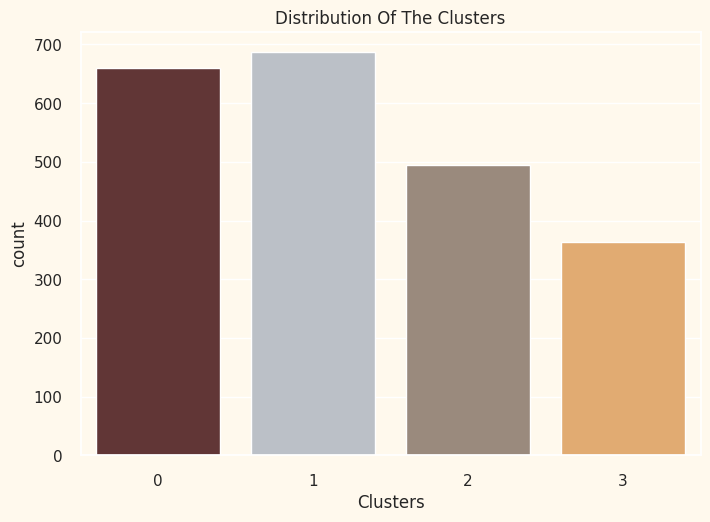

In [41]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], hue=data["Clusters"], palette=pal, legend=False)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.

In [42]:
#
fig = px.scatter(data, x="Spent", y="Income", color=data["Clusters"].astype(str),
                 title="Cluster's Profile Based On Income And Spending",
                 color_discrete_map={
                    '0': '#682F2F',
                    '1': '#B9C0C9',
                    '2': '#9F8A78',
                    '3': '#F3AB60'
                 },
                 hover_data=['Clusters', 'Spent', 'Income'])

fig.update_layout(title_font_size=20)
fig.show()

**Income vs  spending plot shows the clusters pattern**
* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income
* group 3: high spending & low income  

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

Let us next explore how did our campaigns do in the past.

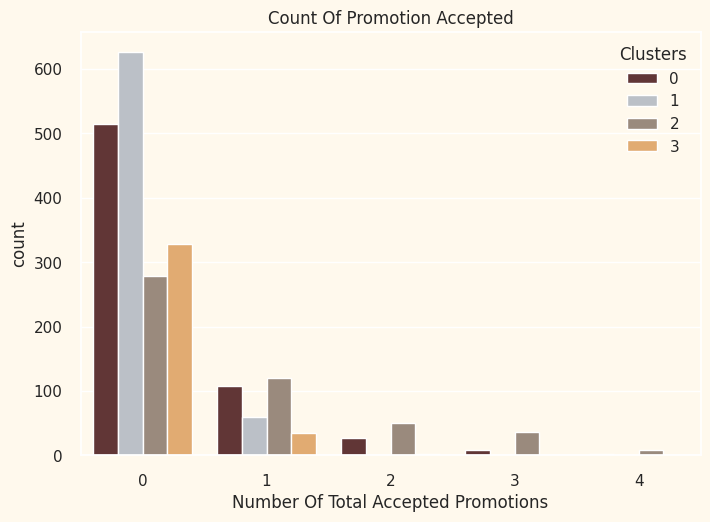

In [43]:
#Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.


<Figure size 800x550 with 0 Axes>

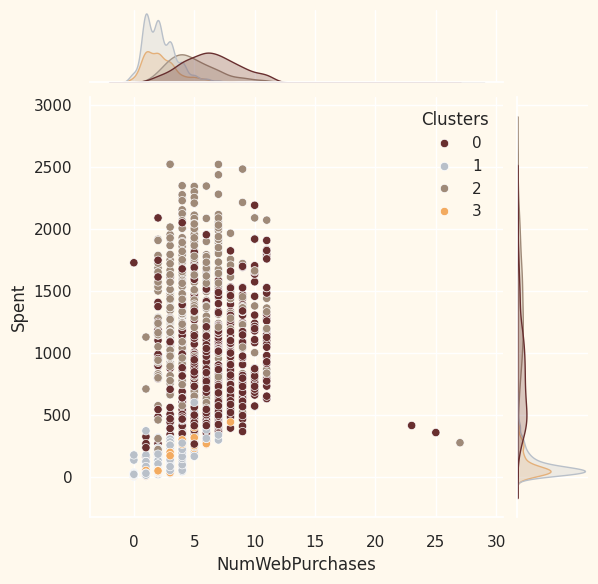

<Figure size 800x550 with 0 Axes>

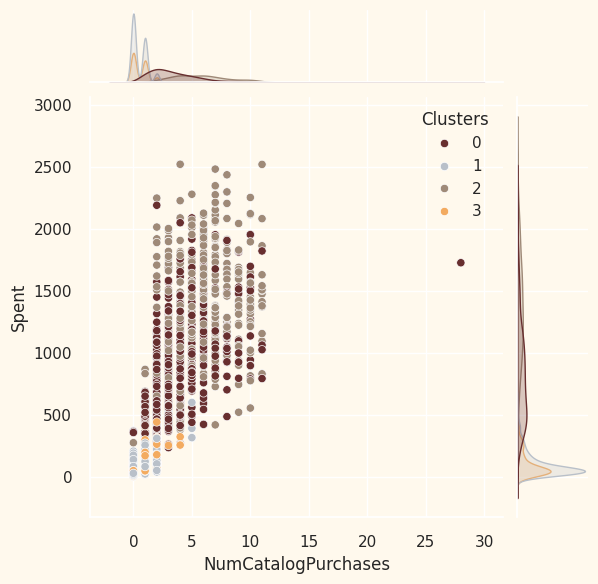

<Figure size 800x550 with 0 Axes>

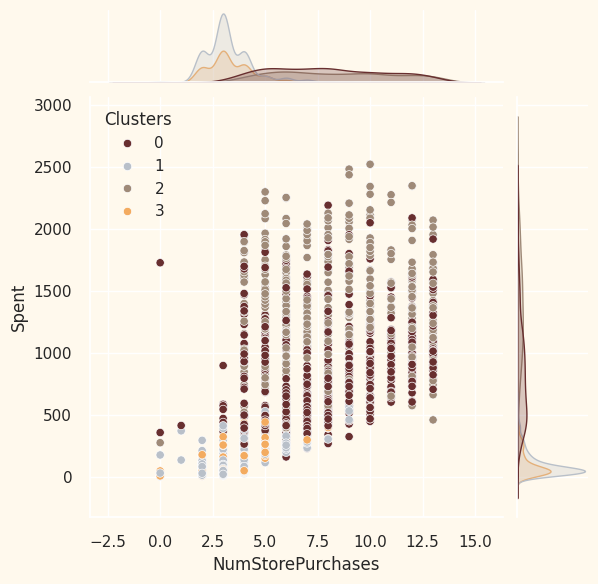

<Figure size 800x550 with 0 Axes>

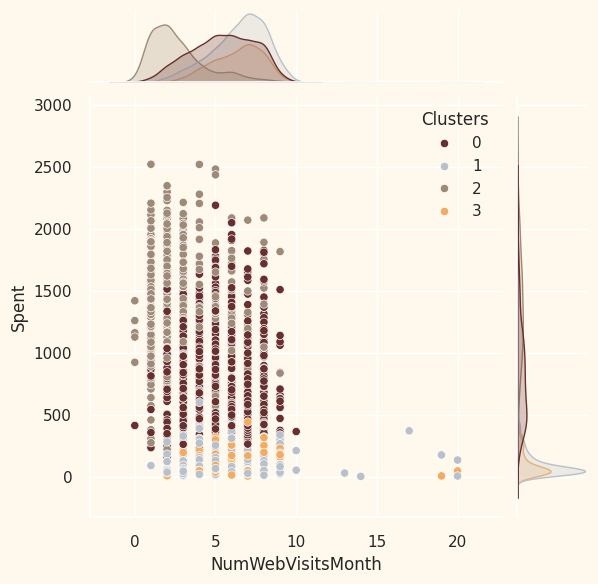

In [44]:
#for more details on the purchasing style
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"]

for i in Places:
    plt.figure()
    sns.jointplot(x=data[i],y = data["Spent"],hue=data["Clusters"], palette= pal)
    plt.show()

<a id="8"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">PROFILING</p>

Now that we have formed the clusters and looked at their purchasing habits.
Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in.
On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 800x550 with 0 Axes>

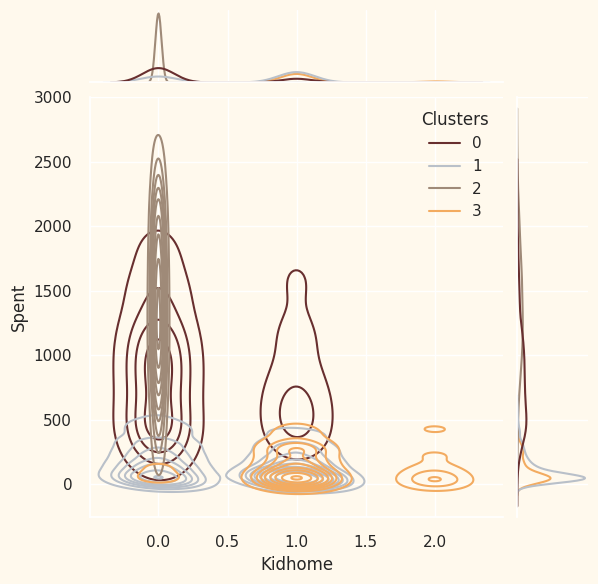

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 800x550 with 0 Axes>

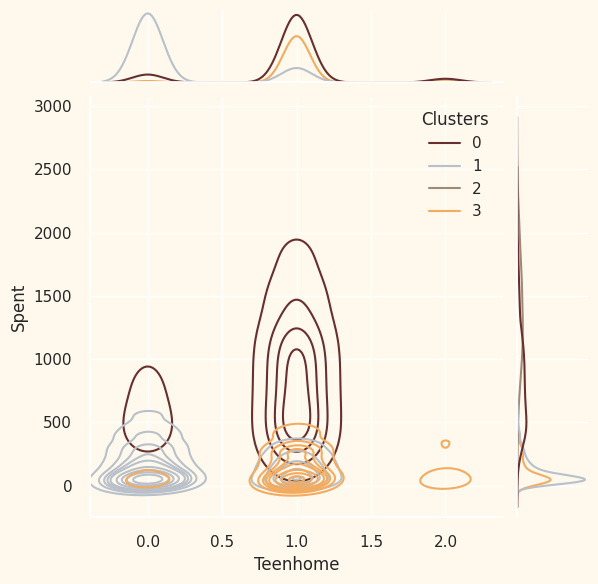

<Figure size 800x550 with 0 Axes>

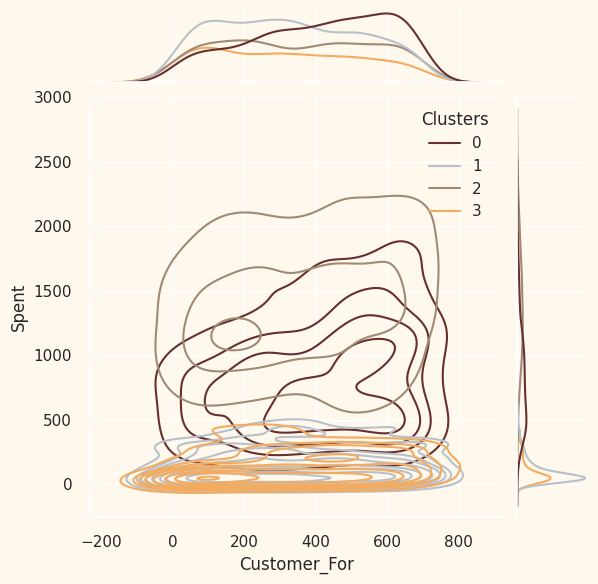

<Figure size 800x550 with 0 Axes>

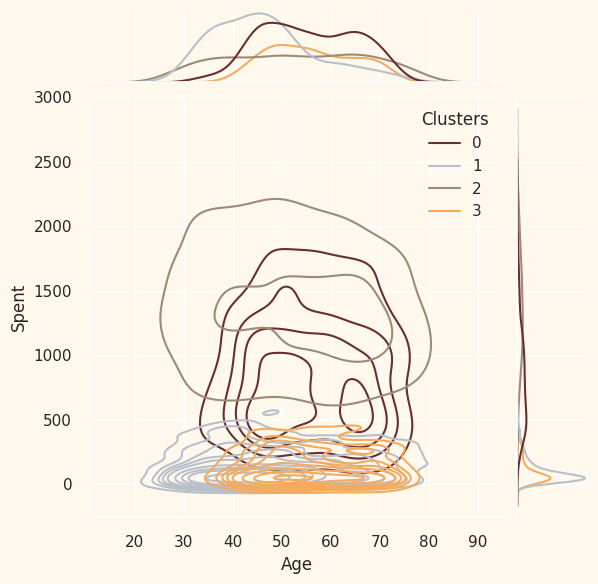

<Figure size 800x550 with 0 Axes>

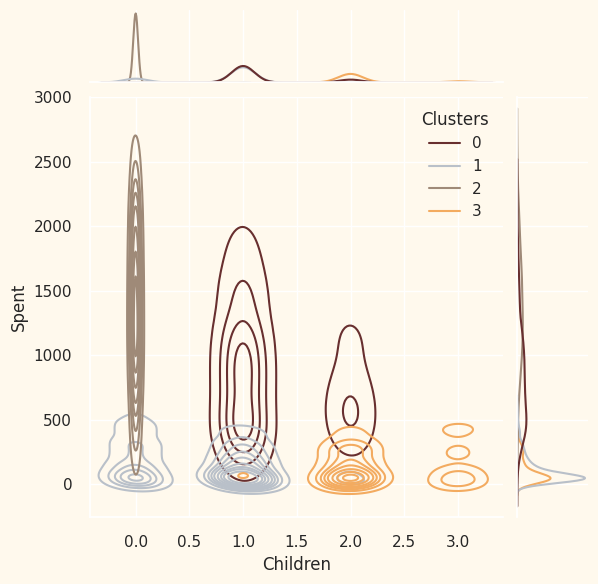

<Figure size 800x550 with 0 Axes>

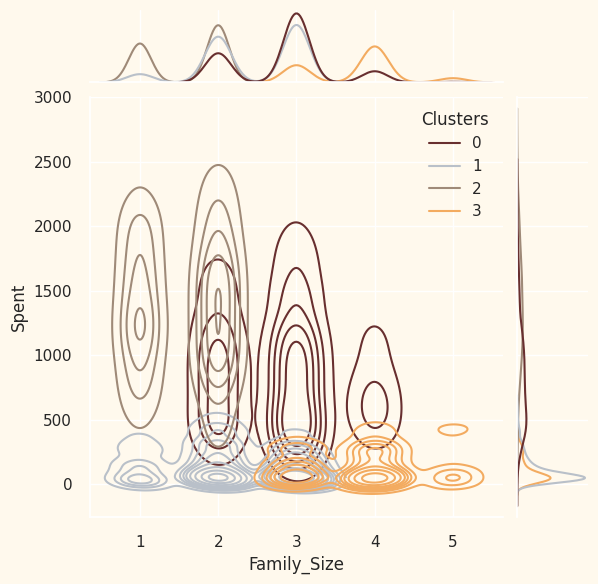

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 800x550 with 0 Axes>

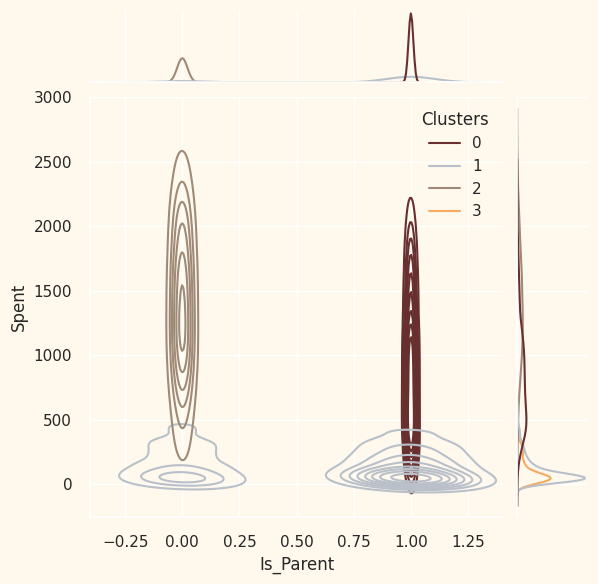

<Figure size 800x550 with 0 Axes>

In [ ]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()


**Points to be noted:**

The following information can be deduced about the customers in different clusters.

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation%20(3).png?raw=true">
  

## CONCLUSION

In this project, I performed unsupervised clustering.
I did use dimensionality reduction followed by agglomerative clustering.
I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending.
This can be used in planning better marketing strategies.

